In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import expon as exp
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

100


array([6.31658053e-01, 1.71735935e-01, 3.52685972e+00, 1.50591035e+00,
       5.80619091e-01, 9.85155535e-01, 2.01091277e-01, 7.49075925e-04,
       1.82880185e+00, 4.13715532e-01, 1.30097646e+00, 3.30825111e+00,
       1.01349481e+00, 3.14739528e+00, 3.37175357e-01, 8.24229046e-01,
       8.84039537e-01, 4.80542171e-02, 1.44162393e+00, 7.47400882e-01,
       1.22871011e+00, 8.64221175e-01, 1.26129507e+00, 1.85207725e+00,
       2.86514708e-01, 7.60916471e-01, 9.74397852e-01, 4.77322780e-01,
       6.18428542e-01, 1.56506189e-01, 8.71832665e-01, 4.36802958e-01,
       1.17935079e+00, 1.34606160e+00, 6.51531958e-02, 2.01026346e+00,
       1.47583741e+00, 1.24447767e+00, 5.72315817e-01, 4.18539813e-01,
       3.61445651e-01, 1.48828273e-01, 8.84554398e-01, 1.21435256e+00,
       5.83004805e-01, 2.50203878e-02, 2.33333234e+00, 8.52179568e-02,
       3.33754224e-01, 1.56357430e-01, 1.54033965e+00, 8.19137479e-01,
       9.11557663e-01, 1.36125500e+00, 1.06175558e+00, 2.91610553e-01,
      

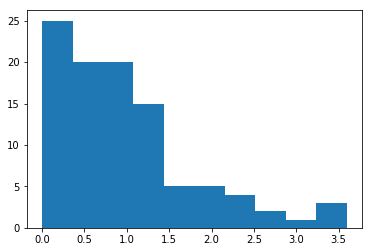

In [11]:
X = np.load('9_1.npy')
print(len(X))
plt.hist(X)
np.array(X)

Имеем выборку $X_1, \ldots, X_n$ из распределения $Exp(\theta)$ с $\theta = \{0.9, 1, 1.1\}$.     
Делаем множественную проверку гипотез. Пусть $H = \{H_1, H_2, H_3\}$ - множество нулевых гипотез против альтернатив $H' = \{\overline{H_1}, \overline{H_2}, \overline{H_3}\}$.   
Здесь: $H_1 : \theta = 0.9$ против альтернативы $\overline{H_1} : \theta \neq 0.9$     
       $H_2 : \theta = 1$ против альтернативы $\overline{H_2} : \theta \neq 1$   
       $H_3 : \theta = 1.1$ против альтернативы $\overline{H_3} : \theta \neq 1.1$ 

CDF: $F_{\theta}(x) = 1 - e^{-\theta x}$  
PDF: $p_{\theta}(x) = \theta e^{-\theta x}$

In [12]:
#empirical function of distribution F*, CDF F_0:
def D_n(Y,th):
    F = []
    for i in range(len(Y)):
        c=0
        for j in range(len(Y)):
            if (Y[j]<=Y[i]):
                c+=1
        F.append(c/len(Y) - exp.cdf(Y[i],scale=th))
    Dn = np.max(F) 
    return Dn

In [13]:
theta = [0.9,1,1.1]
Dn = []
for t in theta:
    Dn.append(D_n(X,t))

В качестве критериев проверки гипотезы возьмём критерий согласия Колмогорова. CDF экспоненциального распределения непрерывна, значит, если $X \in S_n$, где $S_n = \{\sqrt{n}D_n > K_{1-\alpha}\}, D_n = sup |F^*_n(x) - F_0(x)|$, то мы отвергаем основную гипотезу .

In [14]:
D = [Dn[i]*((len(X))**(1/2)) for i in range(3)]
print(D)
#print(1 - np.exp(-X[99]))
#print(exp.cdf(X[99],scale=1))

[0.30596774917722835, 0.6430830006856103, 0.9652083413443535]


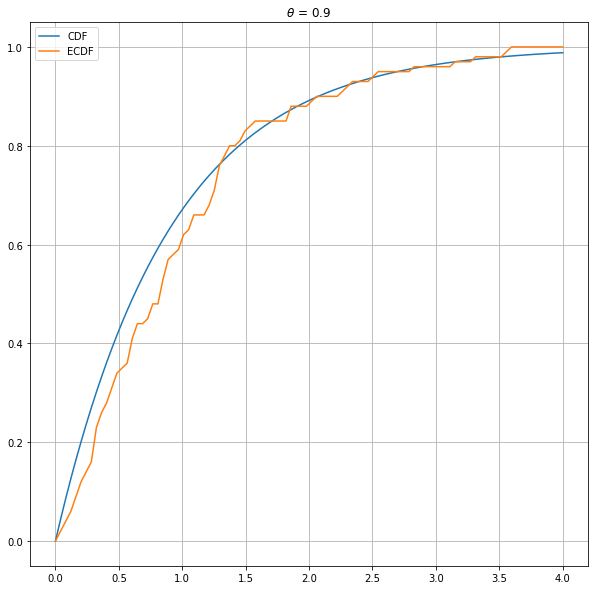

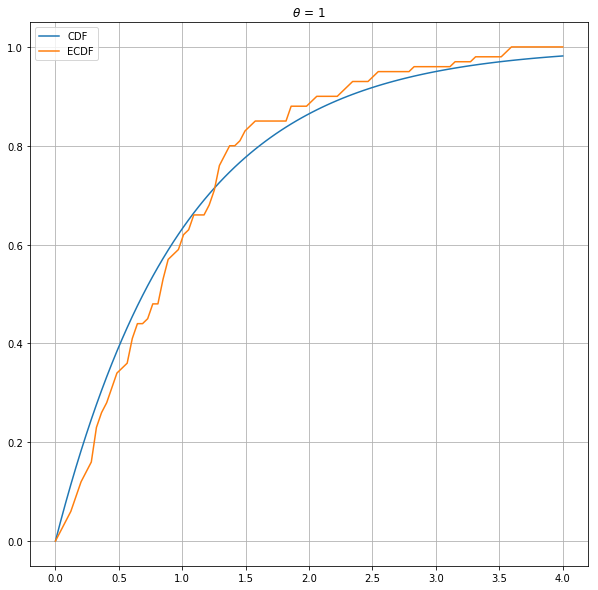

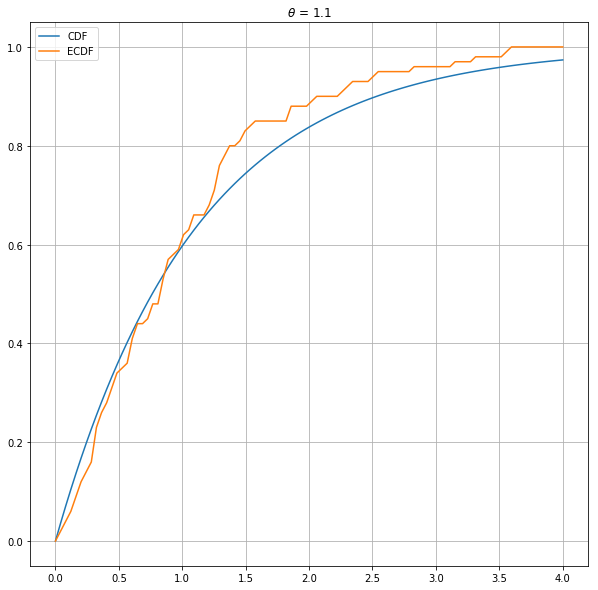

In [18]:
Y = np.linspace(0,4,100)
for th in theta:
    ecdf = ECDF(X[:len(X)])  # Empirical Cumulative Distribution Function
    emp_cdf = ecdf(Y)
    plt.figure(figsize = (10,10))
    plt.title(r'$\theta$ = ' + str(th))
    plt.plot(Y,exp.cdf(Y,scale = th), label = 'CDF')
    plt.plot(Y,emp_cdf, label = 'ECDF')
    plt.grid()
    plt.legend()
    plt.show()

Из графиков видно, что эмпирическая функция распределения, посторенная по выборке, лучше всего приближает CDF при $\theta = 0.9$

В массиве D мы вычислили значения $\sqrt{n}D_n$ для каждого $\theta$. Необходимо определить истинное значение $\theta$. Видим, что при $\theta = 0.9$ $\sqrt{n}D_n$ принимает наименьшее значение, значит, максимальное значение эмпирической функции распределения, построенной по данной выборке, от CDF экспоненциального распределения с параметром 0.9 минимальное среди всех остальных предложенных $\theta$.

Вывод: $P(X \in S_n | \theta = 0.9) = P(\sqrt{n}D_n > K_{1-\alpha} | \theta = 0.9) \leq P(\sqrt{n}D_n > K_{1-\alpha} | \theta \in \{1,1.1\}) \forall \alpha$, значит, при $\theta = 0.9$ большая вероятность принять основную гипотезу:  
$H_1: \theta = 0.9$ vs $H'_1: \theta \neq 0.9$. 0.9 - истинное значение.